# Homework

使用 Python 針對 Employee 資料進行敘述統計分析。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

In [2]:
employee_data = pd.read_csv("Employee data.csv").iloc[:, 1:]
employee_data

,gender,bdate,educ,jobcat,salary,salbegin,jobtime,prevexp,minority
0,m,2/3/1952,15,3,57000,27000,98,144,0
1,m,5/23/1958,16,1,40200,18750,98,36,0
2,f,7/26/1929,12,1,21450,12000,98,381,0
3,f,4/15/1947,8,1,21900,13200,98,190,0
4,m,2/9/1955,15,1,45000,21000,98,138,0
...,...,...,...,...,...,...,...,...,...
469,m,1/22/1964,12,1,26250,15750,64,69,1
470,m,8/3/1966,15,1,26400,15750,64,32,1
471,m,2/21/1966,15,1,39150,15750,63,46,0
472,f,11/25/1937,12,1,21450,12750,63,139,0


## Question 1

對性別、職別、種族區隔統計呈現次數，並畫成圓餅圖。

In [3]:
gender_occurrences = (
    employee_data["gender"].replace({"m": "Male", "f": "Female"}).value_counts()
)
jobcat_occurrences = employee_data["jobcat"].value_counts().sort_index()
minority_occurrences = (
    employee_data["minority"].replace({0: "Non-minority", 1: "Minority"}).value_counts()
)

In [4]:
gender_occurrences.to_frame()

,count
gender,
Male,258
Female,216


In [5]:
jobcat_occurrences.to_frame()

,count
jobcat,
1,363
2,27
3,84


In [6]:
minority_occurrences.to_frame()

,count
minority,
Non-minority,370
Minority,104


圓餅圖：

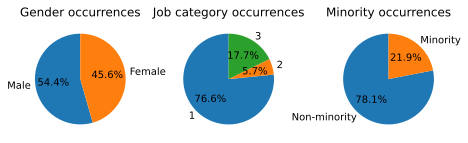

In [7]:
fig, ax = plt.subplots(1, 3, layout="constrained")

gender_occurrences.plot(
    kind="pie",
    ax=ax[0],
    autopct="%1.1f%%",
    startangle=90,
    title="Gender occurrences",
    ylabel="",
)
jobcat_occurrences.plot(
    kind="pie",
    ax=ax[1],
    autopct="%1.1f%%",
    startangle=90,
    title="Job category occurrences",
    ylabel="",
)
minority_occurrences.plot(
    kind="pie",
    ax=ax[2],
    autopct="%1.1f%%",
    startangle=90,
    title="Minority occurrences",
    ylabel="",
)

plt.show()

## Question 2

針對教育程度、目前薪資、起薪、在本公司年資、以前資歷，計算出平均數、中位數、標準差、變異數、最大值、最小值、偏態、峰度，並畫成直方圖。

In [8]:
education_stat = employee_data[
    ["educ", "salary", "salbegin", "jobtime", "prevexp"]
].agg(["count", "min", "max", "mean", "median", "std", "var", "sem", "skew", "kurt"])

education_stat

,educ,salary,salbegin,jobtime,prevexp
count,474.000000,4.740000e+02,4.740000e+02,474.000000,474.000000
min,8.000000,1.575000e+04,9.000000e+03,63.000000,0.000000
max,21.000000,1.350000e+05,7.998000e+04,98.000000,476.000000
mean,13.491561,3.441957e+04,1.701609e+04,81.109705,95.860759
median,12.000000,2.887500e+04,1.500000e+04,81.000000,55.000000
std,2.884846,1.707566e+04,7.870638e+03,10.060945,104.586236
var,8.322339,2.915782e+08,6.194694e+07,101.222612,10938.280783
sem,0.132505,7.843111e+02,3.615104e+02,0.462115,4.803805
skew,-0.114107,2.124606e+00,2.852856e+00,-0.052570,1.509984
kurt,-0.265000,5.377822e+00,1.239021e+01,-1.152594,1.695953


繪製直方圖。

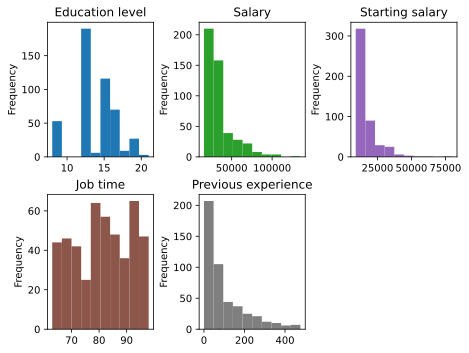

In [9]:
fig, ax = plt.subplots(2, 3, layout="constrained")

employee_data["educ"].plot(
    kind="hist", ax=ax[0, 0], title="Education level", color="tab:blue"
)
employee_data["salary"].plot(
    kind="hist", ax=ax[0, 1], title="Salary", color="tab:green"
)
employee_data["salbegin"].plot(
    kind="hist", ax=ax[0, 2], title="Starting salary", color="tab:purple"
)
employee_data["jobtime"].plot(
    kind="hist", ax=ax[1, 0], title="Job time", color="tab:brown"
)
employee_data["prevexp"].plot(
    kind="hist", ax=ax[1, 1], title="Previous experience", color="tab:gray"
)

fig.delaxes(ax[1, 2])

plt.show()